In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

In [2]:
# Importing the Data Set
breast = load_breast_cancer()
breast_data = breast.data
breast_target = breast.target

In [3]:
# Problem 1

# Creating the naive bayes model and fitting it
model = GaussianNB()
model.fit(breast_data, breast_target)

# Creating predictions with the test data
expected = breast_target
predicted = model.predict(breast_data) 

In [4]:
# Summarize the fit of the model
print(model)
print(metrics.classification_report(expected, predicted))
print("Accuracy: %.3f%%" % (metrics.accuracy_score(expected, predicted)*100.0))
print("Precision: %.3f%%" % (metrics.precision_score(expected, predicted)*100.0))
print("Recall: %.3f%%" % (metrics.recall_score(expected, predicted)*100.0))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

Accuracy: 94.200%
Precision: 93.784%
Recall: 97.199%
[[189  23]
 [ 10 347]]


In [5]:
# Problem 2 PCA Feature Extraction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Importing and cleaning the data
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
X = breast_dataset.iloc[:,:30].values 
Y = breast_dataset.iloc[:, 30].values 

# Scaling the features
sc = StandardScaler() 
std = sc.fit_transform(X)
accuracy = []
precision = []
recall = []

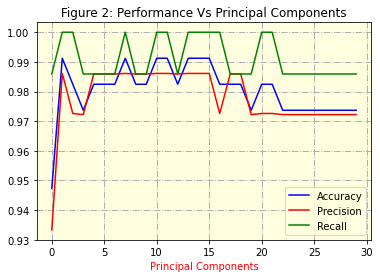

In [6]:
for i in range(30):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the logistic model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state = 42)
    classifier = classifier = LogisticRegression(random_state = 42)
    classifier.fit(X_train, Y_train)

    # Creating predictions with the test data
    Y_pred = classifier.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

# Plotting the accuracy, precision, and recall against the iterations
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(30),accuracy, label = 'Accuracy', color = 'blue')
plt.plot(range(30),precision, label = 'Precision', color = 'red')
plt.plot(range(30),recall, label = 'Recall',  color = 'green')
plt.xlabel('Principal Components', color = 'red')
plt.title('Figure 2: Performance Vs Principal Components')
plt.grid(linestyle='-.', linewidth='1')
plt.legend()
plt.show();

In [7]:
#Problem 3 PCA Feature Extraction & Naïve Bayesian
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
X = breast_dataset.iloc[:,:30].values 
Y = breast_dataset.iloc[:, 30].values 

# Scaling the features
sc = StandardScaler() 
std = sc.fit_transform(X)
accuracy = []
precision = []
recall = []

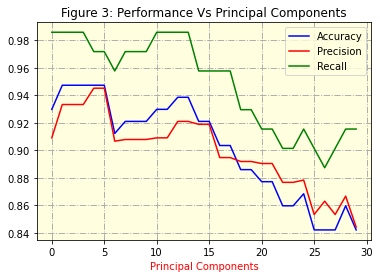

In [8]:
for i in range(30):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the logistic model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state = 42)
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)

    # Creating predictions with the test data
    Y_pred = classifier.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

# Plotting the accuracy, precision, and recall against the iterations
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(30),accuracy, label = 'Accuracy', color = 'blue')
plt.plot(range(30),precision, label = 'Precision', color = 'red')
plt.plot(range(30),recall, label = 'Recall',  color = 'green')
plt.xlabel('Principal Components', color = 'red')
plt.title('Figure 3: Performance Vs Principal Components')
plt.grid(linestyle='-.', linewidth='1')
plt.legend()
plt.show();